In [1]:
# Load required libraries
import numpy as np
import pandas as pd
from pandas.plotting import andrews_curves # pandas.tools.plotting throws an error
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Datasets and data manipulation

In [9]:
# Load example dataset
# sns.get_dataset_names()  # List all dataset names
df1 = sns.load_dataset('diamonds')
df2 = sns.load_dataset('dots')

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


In [47]:
# View datasets
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
# Reshape the data to merge all the plotting columns into a single column
# Reshape for violinplot, catplot
# No reshape for pairplot
df3=df2.melt(id_vars=['align','choice'],var_name='field',value_name='values')
df3

,align,choice,field,values
0,dots,T1,time,-80.000000
1,dots,T1,time,-80.000000
2,dots,T1,time,-80.000000
3,dots,T1,time,-80.000000
4,dots,T1,time,-80.000000
...,...,...,...,...
2539,sacc,T2,firing_rate,33.281734
2540,sacc,T2,firing_rate,27.583979
2541,sacc,T2,firing_rate,28.511530
2542,sacc,T2,firing_rate,27.009804


In [60]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [68]:
# # Keep only selected columns
df4=df1.iloc[1:5000,[1,5,6,7]]
df4=df4.set_index(df4.cut).iloc[:,1:]
# df.iloc[:, ::-1] or iloc[::-1]
df4
# df3=df1[df1['Class'].str.match('Dark')].iloc[:,[14,5,6,7,8,9,10,11,12,13]]
# df3=df3.set_index(df3.ids).iloc[:,1:]
# df3

,table,price,x
cut,,,
Premium,61.0,326,3.89
Good,65.0,327,4.05
Premium,58.0,334,4.20
Good,58.0,335,4.34
Very Good,57.0,336,3.94
...,...,...,...
Ideal,54.8,3741,5.68
Ideal,56.0,3741,5.34
Good,63.0,3741,6.04


In [3]:
pwd

'/Users/rtaujale/git/scripts'

In [19]:
# df=pd.read_csv("../../GT/gta_revise13/Data_availability/manuscript/figures/domains_TMhelixStat.tsv.e1", sep="\t")
# df=pd.read_csv("../../GT/gta_revise13/Data_availability/manuscript/figures/figure2_stats/seq_len.up.comb2", sep="\t")
df=pd.read_csv("../../GT/gta_revise13/Data_availability/manuscript/figures/figure2_stats/seq_counts.tsv", sep="\t")
df

,Count,Family
0,41360,GT2-Class1
1,28779,GT2-DPs
2,10733,GT2-LpsRelated
3,10668,GT2-Rham-GlfT
4,9236,GT2-CWR
5,8254,GT2-CeS
6,5347,GT2-Chitin-HAS
7,3350,GT14
8,3318,GT32
9,3270,GT27


In [2]:
pwd

'/Users/rtaujale/git/scripts'

In [15]:
df1=df.groupby(['Clade','Family']).mean().reset_index()

In [16]:
df1

,Clade,Family,DomLen,FullLen
0,Clade1,GT2-Bre3,227.020833,521.885417
1,Clade1,GT2-CWR,217.068969,470.351234
2,Clade1,GT2-CeS,250.691907,712.337291
3,Clade1,GT2-Chitin-HAS,263.817655,975.011595
4,Clade1,GT21,242.625187,442.715892
5,Clade1,GT84,246.341333,913.840000
6,Clade2,GT2-DPs,201.437541,309.103270
7,Clade2,GT55,309.027027,465.054054
8,Clade2,GT78,226.500000,475.750000
9,Clade2,GT81,220.102551,353.931806


## Plotting functions

(0, 3500)

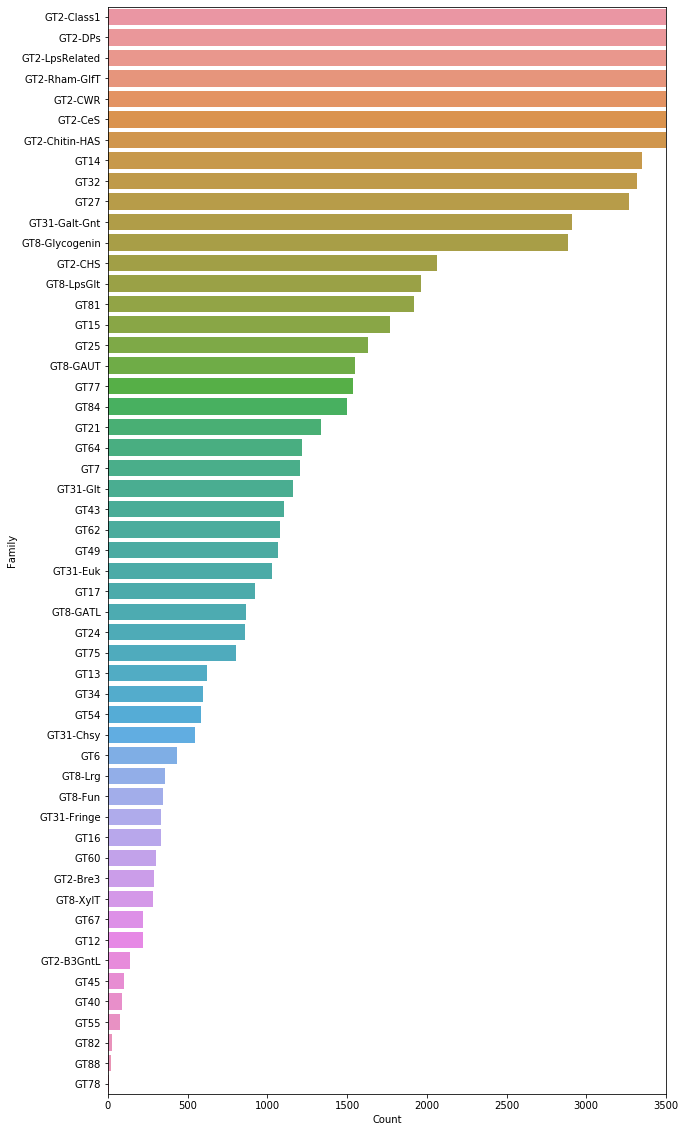

In [29]:
# # Bar plot
plt.figure(figsize=(10,20))
sns_plot=sns.barplot(x="Count",y="Family",data=df)
sns_plot.set_xlim(0,3500)


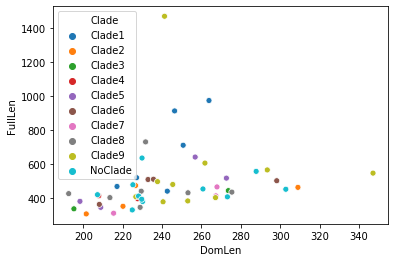

In [17]:
# # Scatter plot
sns_plot=sns.scatterplot(x="DomLen",y="FullLen",data=df1, hue="Clade")

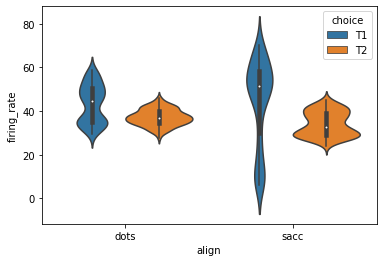

In [10]:
# # Violin plot with separated groups
sns_plot=sns.violinplot(x="align",y="firing_rate",hue="choice",data=df2,dtype = 'float')

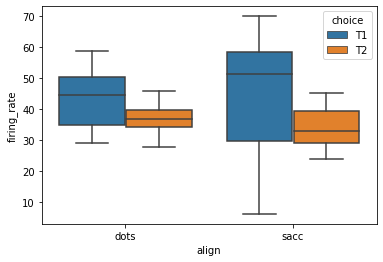

In [23]:
# # Boxplot
sns_plot=sns.boxplot(x="align",y="firing_rate",hue="choice",data=df2)

[None, None]

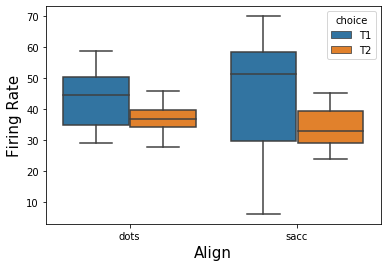

In [30]:
# # Manipulate box and violin plots; Same parameters for violin and boxplots
sns_plot=sns.boxplot(x="align",y="firing_rate",hue="choice",data=df2)
sns_plot.tick_params(labelsize=10)
sns_plot.set_xlabel("Align",fontsize=15)
sns_plot.set_ylabel("Firing Rate",fontsize=15)
plt.setp(sns_plot.get_legend().get_texts(), fontsize='10')
plt.setp(sns_plot.get_legend().get_title(), fontsize='10')

# fig=sns_plot.get_figure()
# fig.savefig("plot.png")

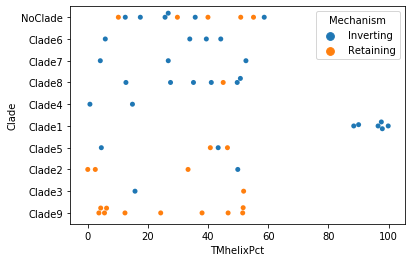

In [16]:
# # Boxenplot
# sns_plot=sns.catplot(x="align",y="firing_rate",hue="choice",data=df2)
sns_plot=sns.swarmplot(x="TMhelixPct",y="Clade",hue="Mechanism",data=df,orient="h")

In [30]:
sns_plot.figure.savefig("seq_count_plot.svg",dpi=300)

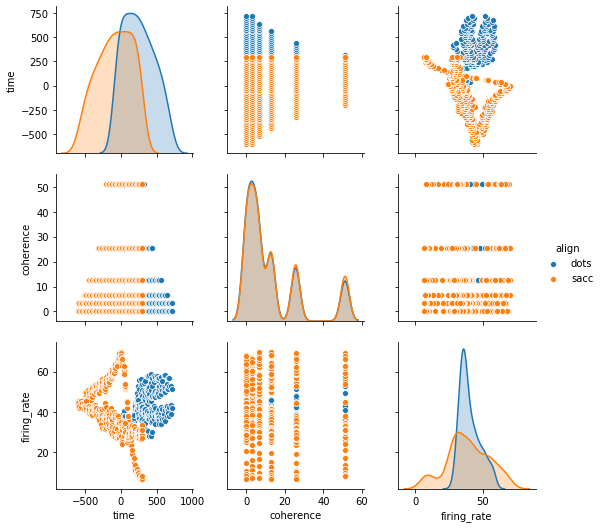

In [40]:
# # Scatterplot matrix
sns.plot=sns.pairplot(df2, hue="align", kind="scatter") # , kind="reg")

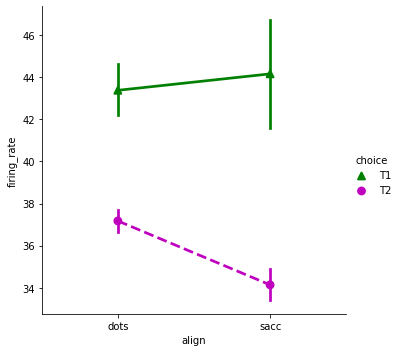

In [46]:
# # Cat plot - Line with categorical x axis
sns.catplot(x="align", y="firing_rate", hue="choice",palette={"T1": "g", "T2": "m"},\
markers=["^", "o"], linestyles=["-", "--"],kind="point", data=df2);


In [55]:
df4

,color,table,price,x
0,E,55.0,326,3.95
1,E,61.0,326,3.89
2,E,65.0,327,4.05
3,I,58.0,334,4.20
4,J,58.0,335,4.34
...,...,...,...,...
53935,D,57.0,2757,5.75
53936,D,55.0,2757,5.69
53937,D,60.0,2757,5.66
53938,H,58.0,2757,6.15


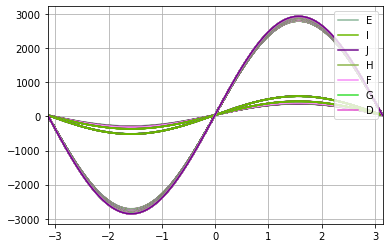

In [57]:
# # Andrew's plot
# Select only numeric columns to plot in x-axis and the column you want to group by.
# Order of variables in the group matters. Last variables only have minimum effect in the curves.
andrews_curves(df4,'color')

In [58]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

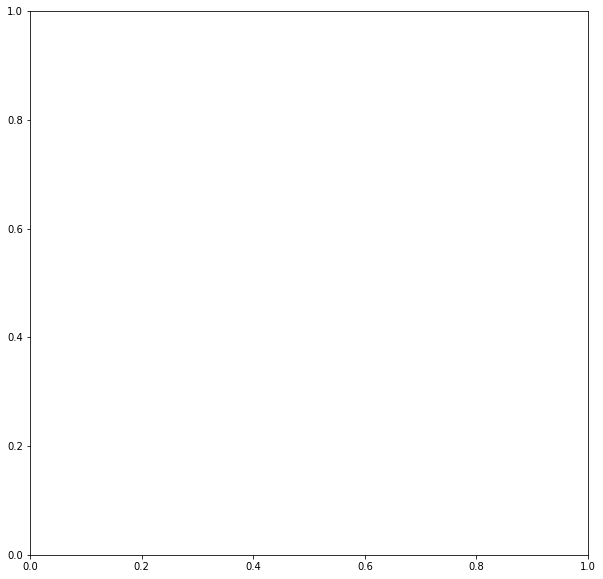

In [59]:
# # Heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns_plot=sns.heatmap(df.iloc[0:100,, cmap='Reds', ax=ax, xticklabels=True, yticklabels=True,  \
                    cbar=False ) # linewidth=0.05, linecolor='lightgray'
sns_plot.xaxis.set_ticks_position('top')
sns_plot.set_yticklabels(sns_plot.get_yticklabels(), rotation = 0, fontsize = 10)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation = 0, fontsize = 40)
#fig=sns_plot.get_figure()
#fig.savefig("plot.svg", dpi=200)